In [1]:
import pandas as pd
import os
import tkinter as tk
from tkinter import filedialog, messagebox
import matplotlib.pyplot as plt
import random
root = tk.Tk()
root.withdraw()
root.attributes("-topmost", True)

''

In [2]:
messagebox.showinfo('OnSSET', 'Browse to SUMMARIES folder where your summaries have been saved')
summary_folder = filedialog.askdirectory()

messagebox.showinfo('OnSSET', 'Open the specs file')
specs_path = filedialog.askopenfilename()
specs = pd.read_excel(specs_path, index_col=0)
scenario_info = pd.read_excel(specs_path, sheet_name='ScenarioInfo')
scenarios = scenario_info['Scenario']

In [3]:
levers = scenario_info.columns
levers = levers.to_list()
del levers[0]
investment_dict = {}
grid_pop_dict = {}
mg_pop_dict = {}
sa_pop_dict = {}
count_dict = {}
for lever in levers:
    investment_dict[lever] = {}
    grid_pop_dict[lever] = {}
    mg_pop_dict[lever] = {}
    sa_pop_dict[lever] = {}
    count_dict[lever] = {}
    
    unique_values = scenario_info[lever].unique()
    for value in unique_values:
        count = len(scenario_info.loc[scenario_info[lever] == value])
        count_dict[lever][value] = count
        investment_dict[lever][value] = 0
        grid_pop_dict[lever][value] = 0
        mg_pop_dict[lever][value] = 0
        sa_pop_dict[lever][value] = 0

for scenario in scenarios:
    
    # COPY THESE LINES FROM YOUR runner.py FILE FOR THE LEVERS YOU ARE USING
    
    pop_index = scenario_info.iloc[scenario]['PopIndex']
    electification_rate_index = scenario_info.iloc[scenario]['ElecRateIndex']
    household_dem_index = scenario_info.iloc[scenario]['ResidentialDemand']
    social_productive_dem_index = scenario_info.iloc[scenario]['SocialProductiveDem']
    ind_dem_index = scenario_info.iloc[scenario]['IndustrialDem']
    pv_index = scenario_info.iloc[scenario]['PVIndex']
    
    # COPY THIS LINE FROM THE runner-py FILE
    # The index names in the last parenthesis in the line below should match the index names above
    
    summary_csv = os.path.join(summary_folder, 'cd-{}_{}_{}_{}_{}_{}_summary.csv'.format(pop_index, electification_rate_index, household_dem_index, social_productive_dem_index, ind_dem_index, pv_index))
    
    
    # The following part runs the summary analysis
    
    summary = pd.read_csv(summary_csv)
    investment =  summary.iloc[7][4] + summary.iloc[7][8]
    pop_grid = summary.iloc[0][5]
    pop_mg  = summary.iloc[3][5] + summary.iloc[4][5] +summary.iloc[5][5] + summary.iloc[6][5]
    pop_sa = summary.iloc[1][5] + summary.iloc[2][5]
    
    for lever in levers:
        lever_value = scenario_info.iloc[scenario][lever]
        
        investment_dict[lever][lever_value] += investment
        grid_pop_dict[lever][lever_value] += pop_grid
        mg_pop_dict[lever][lever_value] += pop_mg
        sa_pop_dict[lever][lever_value] += pop_sa
            
for lever in count_dict:
    for key in count_dict[lever]:
        investment_dict[lever][key] = investment_dict[lever][key] / count_dict[lever][key]
        grid_pop_dict[lever][key] = grid_pop_dict[lever][key] / count_dict[lever][key] / 1000000
        mg_pop_dict[lever][key] = mg_pop_dict[lever][key] / count_dict[lever][key] / 1000000
        sa_pop_dict[lever][key] = sa_pop_dict[lever][key] / count_dict[lever][key] / 1000000

In [4]:
keys = []
investment_values = []
grid_pop_values = []
mg_pop_values = []
sa_pop_values = []
colors = []

for lever in count_dict:
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    
    for lever_option in count_dict[lever]:
        colors.append(color)
        keys.append('{}_{}'.format(lever, lever_option))
        investment_values.append(investment_dict[lever][lever_option])
        grid_pop_values.append(grid_pop_dict[lever][lever_option])
        mg_pop_values.append(mg_pop_dict[lever][lever_option])
        sa_pop_values.append(sa_pop_dict[lever][lever_option])

<BarContainer object of 16 artists>

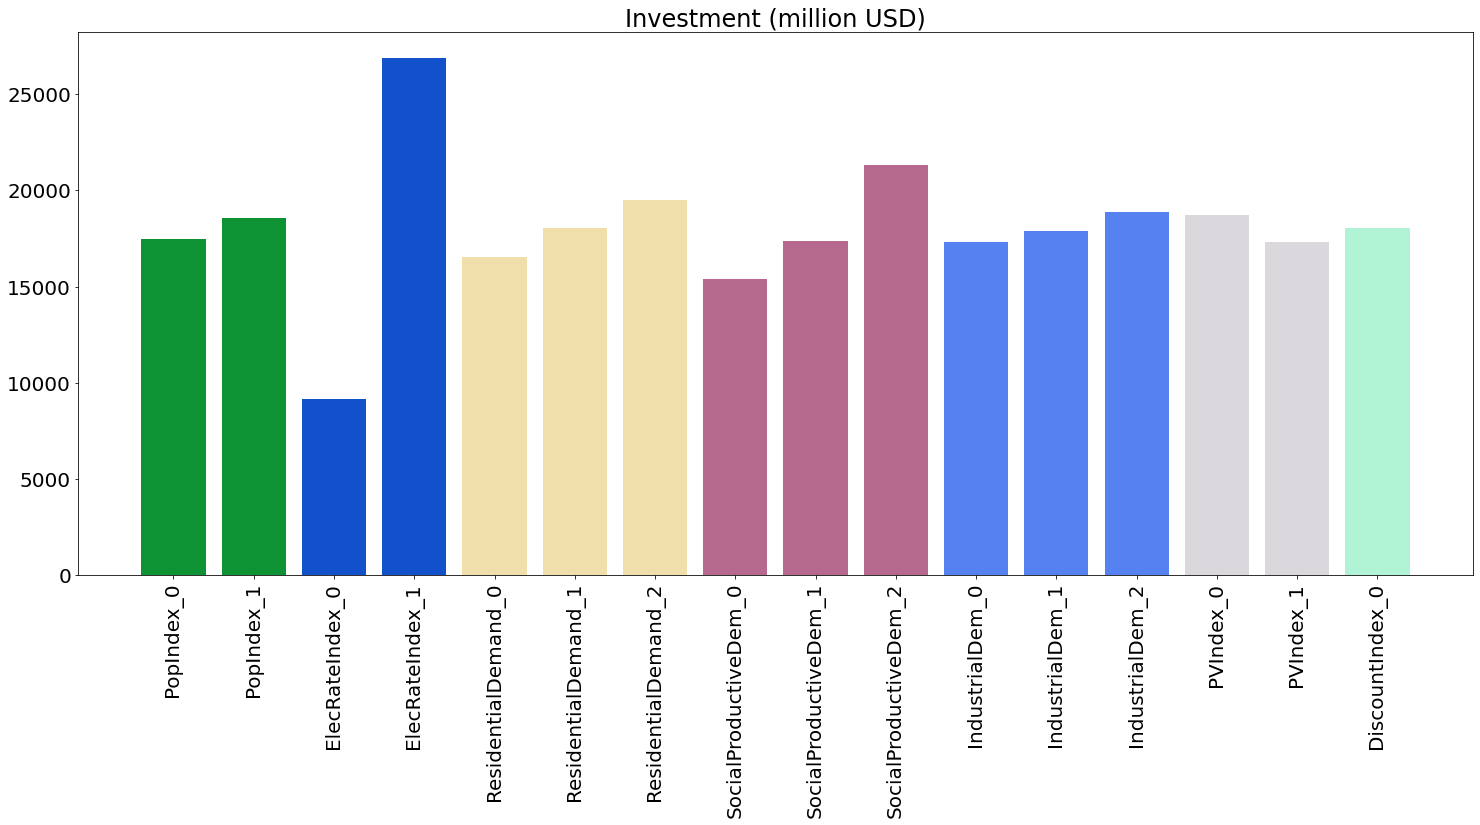

In [6]:
plt.figure(figsize=(25, 10))
plt.rcParams['font.size'] = 20
plt.title('Investment (million USD)')
plt.xticks(rotation=90)
plt.bar(keys, investment_values, color=colors)

<BarContainer object of 16 artists>

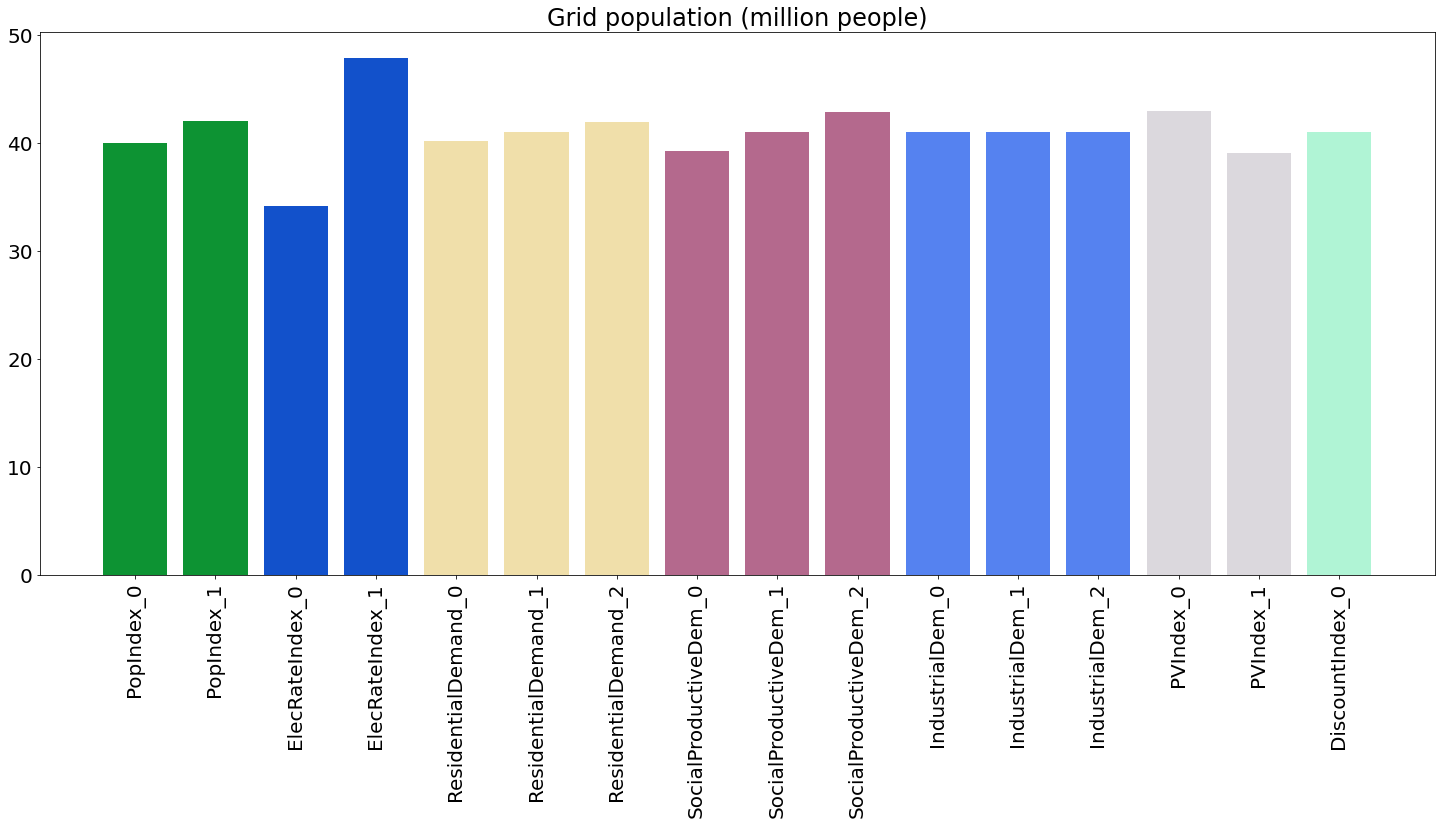

In [7]:
plt.figure(figsize=(25, 10))
plt.rcParams['font.size'] = 20
plt.title('Grid population (million people)')
plt.xticks(rotation=90)
plt.bar(keys, grid_pop_values, color=colors)

<BarContainer object of 16 artists>

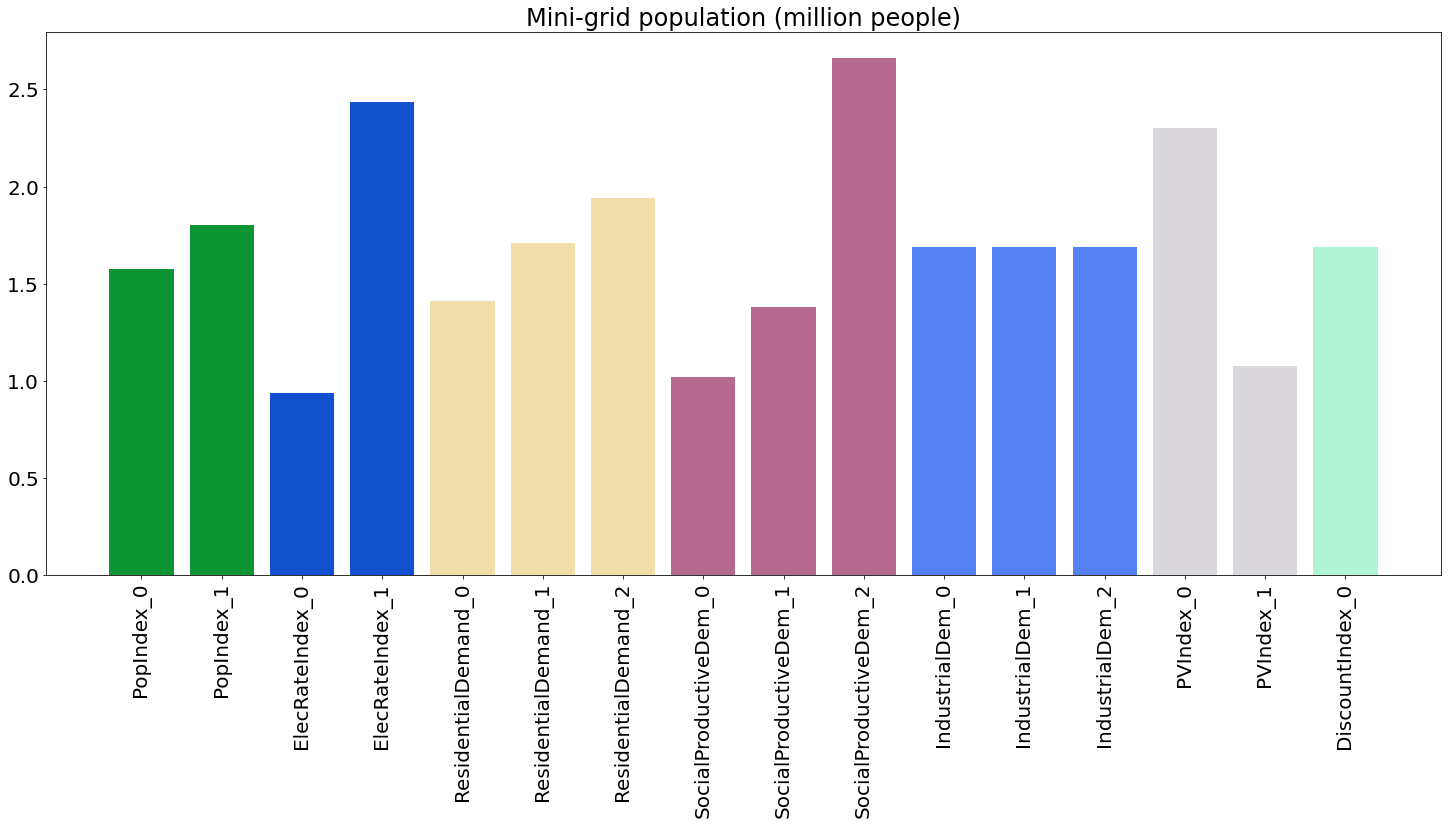

In [8]:
plt.figure(figsize=(25, 10))
plt.rcParams['font.size'] = 20
plt.title('Mini-grid population (million people)')
plt.xticks(rotation=90)
plt.bar(keys, mg_pop_values, color=colors)

<BarContainer object of 16 artists>

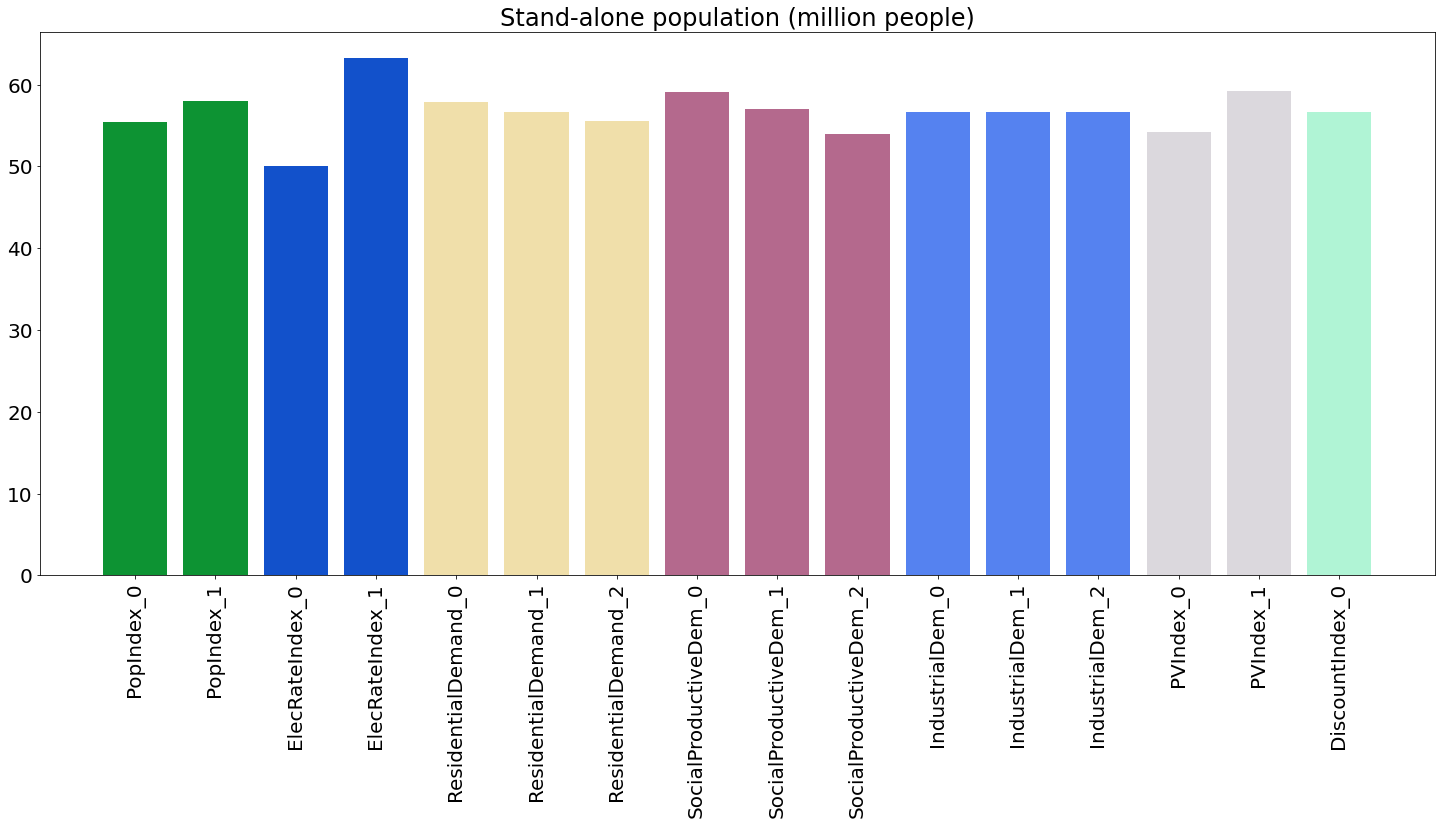

In [9]:
plt.figure(figsize=(25, 10))
plt.rcParams['font.size'] = 20
plt.title('Stand-alone population (million people)')
plt.xticks(rotation=90)
plt.bar(keys, sa_pop_values, color=colors)